In [1]:
import pandas as  pd
import numpy as np
import warnings 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from scipy import stats
import pandas_profiling
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import tsa
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_prefix_path = '/Users/elvis/ITProjects/GitHub/PythonTask/Competitions/datasets/ThePurchaseAndRedemption/'
data_balance = pd.read_csv(data_prefix_path+'user_balance_table.csv')

In [3]:
data_balance.head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0        1     20140805     20385     20383                   2   
1        1     20140808     20391     20389                   2   
2        1     20140811     20397     20395                   2   
3        1     20140814     20403     20401                   2   
4        1     20140817     20409     20407                   2   

   direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  total_redeem_amt  \
0                    0                 0                  0                 0   
1                    0                 0                  0                 0   
2                    0                 0                  0                 0   
3                    0                 0                  0                 0   
4                    0                 0                  0                 0   

   consume_amt  transfer_amt  tftobal_amt  tftocard_amt  share_amt  category1  \
0            0             0            0             0          2        NaN   
1            0             0            0             0          2        NaN   
2            0             0            0             0          2        NaN   
3            0             0            0             0          2        NaN   
4            0             0            0             0          2        NaN   

   category2  category3  category4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

In [4]:
data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
total_balance = data_balance.groupby('date')['total_purchase_amt','total_redeem_amt'].sum().reset_index()
total_balance.head()

date  total_purchase_amt  total_redeem_amt
0 2013-07-01            32488348           5525022
1 2013-07-02            29037390           2554548
2 2013-07-03            27270770           5953867
3 2013-07-04            18321185           6410729
4 2013-07-05            11648749           2763587

In [5]:
total_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
date                  427 non-null datetime64[ns]
total_purchase_amt    427 non-null int64
total_redeem_amt      427 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 10.1 KB


In [6]:
# dataset = pd.read_csv(data_prefix_path+'user_balance_table.csv',parse_dates=['report_date'])
# dataset

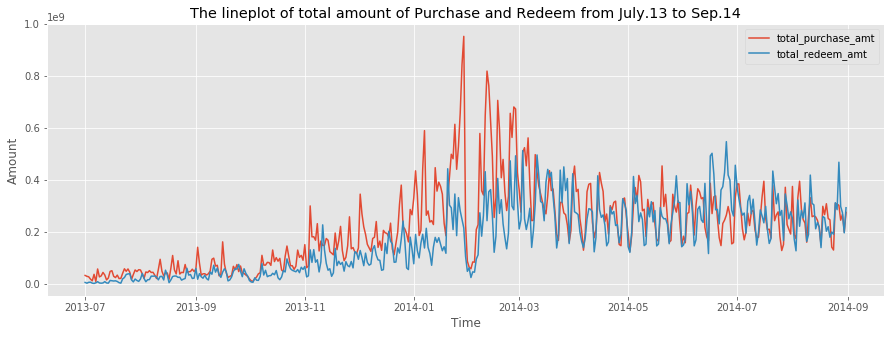

In [7]:
##时序图
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='total_purchase_amt')
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='total_redeem_amt')

plt.legend(loc='best')
plt.title("The lineplot of total amount of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [8]:
t_purchase=tsa.stattools.adfuller(total_balance['total_purchase_amt'])
output_purchase=pd.DataFrame(index=['p-value'],columns=['value'])
output_purchase['value']['p-value']=t_purchase[1]
t_purchase

(-1.5898802926313507,
 0.4886749751375928,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

In [9]:
dataset = pd.read_csv(data_prefix_path+'user_balance_table.csv',parse_dates=['report_date'])

In [10]:
dataset = dataset.groupby('report_date').sum()
dataset.head()

user_id   tBalance   yBalance  total_purchase_amt  \
report_date                                                      
2013-07-01   6305946  252327861  225364535            32488348   
2013-07-02   6776722  278810703  252327861            29037390   
2013-07-03   7025037  300127606  278810703            27270770   
2013-07-04   7334624  312038062  300127606            18321185   
2013-07-05   7603689  320923224  312038062            11648749   

             direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  \
report_date                                                             
2013-07-01              32458786          21250722           11208064   
2013-07-02              29007510          16561183           12446327   
2013-07-03              27234156          20493660            6740496   
2013-07-04              18282230          12108178            6174052   
2013-07-05              11607991           6930431            4677560   

             total_redeem_amt  consume_amt  transfer_amt  tftobal_amt  \
report_date                                                             
2013-07-01            5525022       382160       5142862      5142862   
2013-07-02            2554548       350066       2204482      2204482   
2013-07-03            5953867       454406       5499461      5499461   
2013-07-04            6410729       535391       5875338      5875338   
2013-07-05            2763587       697926       2065661      2065661   

             tftocard_amt  share_amt  category1  category2  category3  \
report_date                                                             
2013-07-01              0      29562        0.0    89350.0        0.0   
2013-07-02              0      29880        0.0     1650.0        0.0   
2013-07-03              0      36614        0.0    69764.0        0.0   
2013-07-04              0      38955    25078.0   107500.0        0.0   
2013-07-05              0      40758        0.0    51100.0        0.0   

             category4  
report_date             
2013-07-01    292810.0  
2013-07-02    348416.0  
2013-07-03    384642.0  
2013-07-04    402813.0  
2013-07-05    646826.0

In [17]:
purchase_model = ARIMA(dataset['total_purchase_amt'],[7,1,5]).fit()
purchase_predict = purchase_model.predict('2014-09-01','2014-09-30',typ='levels')
purchase_predict

2014-09-01    3.310541e+08
2014-09-02    3.318772e+08
2014-09-03    3.338910e+08
2014-09-04    2.983205e+08
2014-09-05    2.407509e+08
2014-09-06    2.266137e+08
2014-09-07    2.435552e+08
2014-09-08    2.970856e+08
2014-09-09    3.321281e+08
2014-09-10    3.265200e+08
2014-09-11    2.916849e+08
2014-09-12    2.392707e+08
2014-09-13    2.253543e+08
2014-09-14    2.475287e+08
2014-09-15    2.950928e+08
2014-09-16    3.345014e+08
2014-09-17    3.280826e+08
2014-09-18    2.927105e+08
2014-09-19    2.448974e+08
2014-09-20    2.275704e+08
2014-09-21    2.530225e+08
2014-09-22    2.980714e+08
2014-09-23    3.366748e+08
2014-09-24    3.321959e+08
2014-09-25    2.947112e+08
2014-09-26    2.505389e+08
2014-09-27    2.318264e+08
2014-09-28    2.574462e+08
2014-09-29    3.025699e+08
2014-09-30    3.387018e+08
Freq: D, dtype: float64

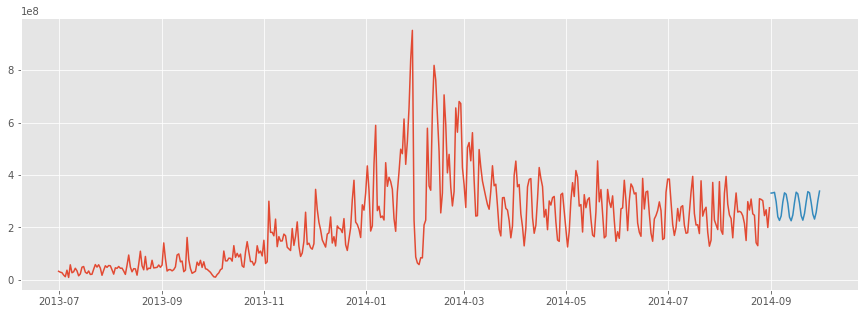

In [18]:
plt.figure(figsize=(15,5))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='total_purchase_amt')
plt.plot(purchase_predict)